In [10]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from pathlib import Path
import random

In [11]:
import sys
sys.path.append("../src/augmentation")  # عشان نقدر نستدعي الملف من فولدر src
from augmentation import get_augmentation_pipeline

In [12]:
base_dir = Path("../data/raw")
train_dir = base_dir / "train"

# نجيب أي صورة عشوائية
all_images = list(train_dir.glob("*.jpg"))
random_image_path = random.choice(all_images)
print("Using image:", random_image_path)

# نقرأ الصورة
img = image.load_img(random_image_path, target_size=(224, 224))  # resize عشان التجربة
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # نضيف dimension للـ batch


Using image: ..\data\raw\train\1056_19_F_la_2.jpg


In [13]:
datagen = get_augmentation_pipeline()


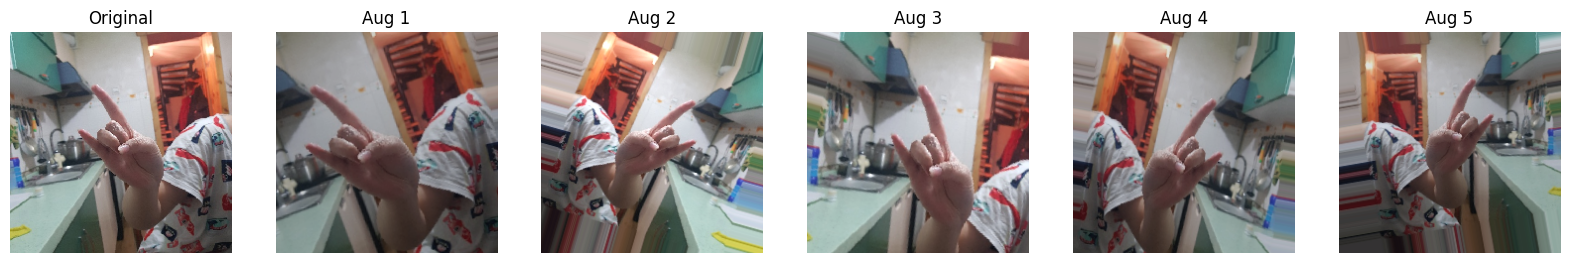

In [14]:
fig, axes = plt.subplots(1, 6, figsize=(20, 5))

# الصورة الأصلية
axes[0].imshow(img)
axes[0].set_title("Original")
axes[0].axis("off")

# صور Augmented
i = 1
for batch in datagen.flow(img_array, batch_size=1):
    axes[i].imshow(batch[0].astype("uint8"))
    axes[i].set_title(f"Aug {i}")
    axes[i].axis("off")
    i += 1
    if i > 5:  # نعرض 5 صور augment فقط
        break

plt.show()